In [2]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
import time
wordnet_lemmatizer = WordNetLemmatizer()
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
from googletrans import Translator
import numpy as np
import seaborn as sns
import csv
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from afinn import Afinn

In [133]:
import psutil
import os

In [134]:
def show_info(start): 
    pid = os.getpid() #模块名比较容易理解：获得当前进程的pid 
    p = psutil.Process(pid) #根据pid找到进程，进而找到占用的内存值 
    info = p.memory_full_info() 
    memory = info.uss/1024 
    return memory 

In [3]:
STOPWORDS = ['som','dtype','Dow','Dems','i',"san","C0","Roid","the","You","THE","The",'dont',"WE","We","we","DONT"
 'me','my','myself','dtype','Name','we','our', 'ours','ourselves','you',"you're","you've","amp","he","and","mr",
 "you'll",'youre', 'go', 'say', 'many', 'going', 'would','750',"na","hey", "blah","ha",'djt','youe','hello','didnt','trump','DonaldTrump',
 "you'd",'biden','joebiden','joe','donald',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 'Didnt',
 'dtype',
 'stai',
 'hmmm',
 'Don',
 'Youre',
 'El',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'rt',
 're',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 'now']

In [148]:
def clean(x):
#      remove the retweeted tweet
     x=str(x)
     x = re.sub(r'^RT[\s]+','',x)
#      Replace #word with word
     x = re.sub(r'#', '', x)
#      Convert @username to empty strings
     x= re.sub('@[^\s]+', '', x) 
#       Convert www.* or https?://* to empty strings
     x= re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '',x)
#     Remove all characters which are not alphabets, numbers or whitespaces.
     x = re.sub('[^A-Za-z0-9 ]+','', x)
     return x
    
def lemmatizer(tweet):
    return " ".join([wordnet_lemmatizer.lemmatize(word) for word in tweet.split() if word not in STOPWORDS])

def preprocessing(df):
    df.set_index(pd.to_datetime(df.time.str[:15],format="%Y/%m/%d %H:%M:%S",errors ='coerce').dt.date,inplace=True)
    df.drop(["time"],inplace=True,axis=1)
    df.text=df.text.apply(lambda x : str(x).lower())
#     df=df[df.text.str.count("@")<2]
    
    
    
    
#     df.to_csv("data.csv",encoding='utf-8')
#     with open("data.txt", "w",encoding='utf-8') as my_output_file:
#         with open("data.csv", 'r',encoding='utf-8') as my_input_file:
#             [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
#         my_output_file.close()
    
    start =time.process_time()
    start1=time.time()
    ss=show_info("start")
    df.text=df.text.apply(clean)
    df.text=df.text.apply(lemmatizer)
    ee=show_info("end")
    end1=time.time()
    end = time.process_time()
    
    print('Preprocessing Running time: %s Seconds'%(end-start)) 
    print('Preprocessing Running time: %s Seconds'%(end1-start1))
    print(" memory used " + str(ee-ss) + "KB")
    df.dropna(subset=["text"],axis=0,inplace=True)
    df.drop_duplicates(subset ="text", 
                       keep = 'first', inplace = True) 
    
    print(df.groupby(df.index).count())
    # random choose 5000 samples from the dateset each year
    return df.groupby(df.index).head(5000)
af=Afinn()
# Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
# polarity = lambda x: TextBlob(x).sentiment.polarity
polarity = lambda y: np.mean([af.score(x) for x in y.split(" ")])/5



def add_sentiment(df):
    start =time.process_time()
    ss=show_info("start")
    df['sentiment_polar'] = df.text.apply(polarity)
#     from sklearn import preprocessing
#     scaler = preprocessing.StandardScaler()
#     df['sentiment_polar']= scaler.fit_transform([df['sentiment_polar'].tolist()])[0]
    
    df['sentiment_category'] = ['Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in df.sentiment_polar]
    ee=show_info("end")
    end = time.process_time()
    print('Polarity apply Running time: %s Seconds'%(end-start))
    print(" memory used " + str(ee-ss) + "KB")
    
    return df

def count_sentiment(df):
    # the sum count of three polarity category in dataframe form
    polar_counts = df.sentiment_category.value_counts().rename_axis('category').reset_index(name = 'counts')
    print(polar_counts)
    return polar_counts
    
def visual_sentiment(df):  
    polar_counts=count_sentiment(df)
    # sentiment Polarity Visualization using Matplotlib
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize = (10,10))
    ax.pie(polar_counts['counts'], autopct ='% 1.1f %%', shadow = True, labels = polar_counts['category'],
          colors = ('gray','blue','red'), textprops = {'color':'black','fontsize':'20'})
    ax.set_title('Sentiment Polarization')
    ax.legend(polar_counts['category'], loc = 'upper right')    

def blance_sample(df):
    # Dropping all rows in Trump’s dataset whose statement is neutral with polarity ‘zero’
    # Even, It contains a large no. of neutral polarities that aren’t contributing to our analysis. So drop them all.
    df=df[df['sentiment_category']!="Neutral"]
    # Let's make both the datasets balanced now for fair prediction
    df=df.groupby(df.index).sample(n=2000)
    return df


def plot_result(df):
    sns.distplot(df,x='sentiment_polar')
    plt.show()
    sns.boxplot(df,x='sentiment_polar')
    plt.show()
    
def get_most_pos_neg_text(df,name):
    
    df=df=df[df.text.apply(lambda x: len(set(x.split(" ")))>10)]
    most_positive1 = df[df.sentiment_polar >0].sort_values(by='sentiment_polar', ascending=False).text.head()
    pos_txt1 = list(most_positive1)
    pos1 = df[df.sentiment_polar >0].sort_values(by='sentiment_polar', ascending=False).sentiment_polar.head() 
    pos_pol1 = list(pos1)

    fig = go.Figure(data=[go.Table(columnorder = [1,2], 
                                   columnwidth = [50,400],
                                   header=dict(values=['Polarity',f'Most Positive Replies on {name}\'s Handle'],
                                   fill_color='paleturquoise',
                                   align='left'),
                   cells=dict(values=[pos_pol1, pos_txt1],
                                   fill_color='lavender',
                                   align='left'))])
    fig.show()
    most_negative1 =  df[df.sentiment_polar <0].sort_values(by='sentiment_polar', ascending=True).text.head()
    neg_txt1 = list(most_negative1)
    neg1 = df[df.sentiment_polar <0].sort_values(by='sentiment_polar', ascending= True).sentiment_polar.head()
    neg_pol1 = list(neg1)

    fig = go.Figure(data=[go.Table(columnorder = [1,2],
                                   columnwidth = [50,400],
                                   header=dict(values=['Polarity',f'Most Negative Replies on {name}\'s handle'],
                                   fill_color='paleturquoise',
                                   align='left'),
                    cells=dict(values=[neg_pol1, neg_txt1],
                               fill_color='lavender',
                               align='left'))])

    fig.show()

def show_word_cloud(df):
    # Start with one review:
    text = str(df.text)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

    # Display the generated image:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def tfidf_analysis(df):
    df=df.text
    df=df.reindex(pd.to_datetime(df.index))
    df=df.resample("5d").agg({'text': ' '.join})

    start =time.process_time()
    
   
    tfidf_vec = TfidfVectorizer(ngram_range=(3,3))
    tfidf_mat = tfidf_vec.fit_transform(df['text'].tolist())
    
    end = time.process_time()
    print('tfidf Running time: %s Seconds'%(end-start))

    vocab_dict =tfidf_vec.vocabulary_#获得所有文本的关键字和其位置的dict
    weight = tfidf_mat.toarray()
    feat = np.argsort(-weight)#降序排序
    total_key_word = []
    for l in range(len(df)):
        values_word = []
        for j in range(20):#获取每类文本的5个关键字
            values_word.append(([k for k,v in vocab_dict.items() if v ==feat[l,j]],weight[l,feat[l,j]]))
        total_key_word.append(values_word)
    return total_key_word
   
#     print(total_key_word[0]) 




In [150]:
trump_tweet=pd.read_csv(r"Trump_.csv",encoding="utf-8")

In [144]:
biden_tweet=pd.read_csv(r"joebiden_.csv",encoding="utf-8")

In [145]:
data=pd.concat([trump_tweet,biden_tweet],axis=0)

In [146]:
data.head()

,time,user,text
0,2020/10/16 9:17,DiogenesMan,We will find out shortly how intelligent the A...
1,2020/10/16 9:17,DIDNOTVOTEFOR44,#SCOTUS declined to hear case brought by #Delu...
2,2020/10/16 9:17,33ajel,China will retweet what happened to you in Vie...
3,2020/10/16 9:17,OZAnswers,@TeamTrump @realDonaldTrump Trumpy was:\n\nSwe...
4,2020/10/16 9:17,ToddPoltRRA,@_HenryBolton @JoeBiden @GillyandZia @KamalaHa...


In [147]:
clean_data=preprocessing(data)

Preprocessing Running time: 173.390625 Seconds
Preprocessing Running time: 173.46796369552612 Seconds
 memory used -1126844.0KB
             user   text
time                    
2020-10-15  43452  43452
2020-10-16  39182  39182
2020-10-17  39898  39898
2020-10-18  35158  35158
2020-10-19  47782  47782
2020-10-20  54414  54414
2020-10-21  47330  47330
2020-10-22  94688  94688
2020-10-23  48736  48736
2020-10-24  42632  42632
2020-10-25  44615  44615
2020-10-26  58122  58122
2020-10-27  56694  56694
2020-10-28  60920  60920
2020-10-29  58236  58236
2020-10-30  43535  43535
2020-10-31  41940  41940
2020-11-01  34668  34668
2020-11-02  41082  41082
2020-11-03  38803  38803


In [149]:
add_sentiment(clean_data)

Polarity apply Running time: 16.546875 Seconds
 memory used 2220.0KB


<ipython-input-148-e53c57b287d1>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-e53c57b287d1>:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user,text,sentiment_polar,sentiment_category
time,,,,
2020-10-16,DiogenesMan,find shortly intelligent american people,0.080000,Positive
2020-10-16,DIDNOTVOTEFOR44,scotus declined hear case brought delusional d...,-0.054545,Negative
2020-10-16,33ajel,china retweet happened vietnam,0.000000,Neutral
2020-10-16,OZAnswers,trumpy wassweatysmallon heelsinterruptingrambl...,0.000000,Neutral
2020-10-16,ToddPoltRRA,yeah cool molest like boy scout nah,0.114286,Positive
...,...,...,...,...
2020-10-27,Trickface1,head imagery ritual death,-0.100000,Negative
2020-10-27,Pearlofwisdom2,youve got left sad,-0.100000,Negative
2020-10-27,czarface5,probably lot le colin kaepernick,0.000000,Neutral


# Trump

In [151]:
trump_tweet.head()

,time,user,text
0,2020/10/16 9:17,DiogenesMan,We will find out shortly how intelligent the A...
1,2020/10/16 9:17,DIDNOTVOTEFOR44,#SCOTUS declined to hear case brought by #Delu...
2,2020/10/16 9:17,33ajel,China will retweet what happened to you in Vie...
3,2020/10/16 9:17,OZAnswers,@TeamTrump @realDonaldTrump Trumpy was:\n\nSwe...
4,2020/10/16 9:17,ToddPoltRRA,@_HenryBolton @JoeBiden @GillyandZia @KamalaHa...


In [152]:
clean_trump_tweet=preprocessing(trump_tweet)

Preprocessing Running time: 81.703125 Seconds
Preprocessing Running time: 81.71823954582214 Seconds
 memory used -18024.0KB
             user   text
time                    
2020-10-15  22145  22145
2020-10-16  19256  19256
2020-10-17  20798  20798
2020-10-18  21397  21397
2020-10-19  30105  30105
2020-10-20  27183  27183
2020-10-21  28570  28570
2020-10-22  76182  76182
2020-10-23  27177  27177
2020-10-24  24818  24818
2020-10-25  18943  18943
2020-10-26  37620  37620
2020-10-27  34718  34718
2020-10-28  44242  44242
2020-10-29  37435  37435
2020-10-30  21149  21149
2020-10-31  21480  21480
2020-11-01  13269  13269
2020-11-02  21087  21087
2020-11-03  19705  19705


In [153]:
clean_trump_tweet=add_sentiment(clean_trump_tweet)

Polarity apply Running time: 15.765625 Seconds
 memory used 2024.0KB


<ipython-input-148-e53c57b287d1>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-e53c57b287d1>:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
clean_trump_tweet.head(15)

,user,text,sentiment_polar,sentiment_category
time,,,,
2020-10-16,DiogenesMan,find shortly intelligent american people,0.080000,Positive
2020-10-16,DIDNOTVOTEFOR44,scotus declined hear case brought delusional d...,-0.054545,Negative
2020-10-16,33ajel,china retweet happened vietnam,0.000000,Neutral
2020-10-16,OZAnswers,trumpy wassweatysmallon heelsinterruptingrambl...,0.000000,Neutral
2020-10-16,ToddPoltRRA,yeah cool molest like boy scout nah,0.114286,Positive
2020-10-16,yasminahp11,el presidente e un enviado de dios,0.000000,Neutral
2020-10-16,CTToberNC,travel communist country people fleeing,0.000000,Neutral
2020-10-16,racistbegone,good morning h murderinchief congratulation an...,0.125000,Positive
2020-10-16,Basem_Aram,presidentfor 20 year submitted dv lotteryand 2...,0.022222,Positive


   category  counts
0   Neutral   37164
1  Negative   33879
2  Positive   28959


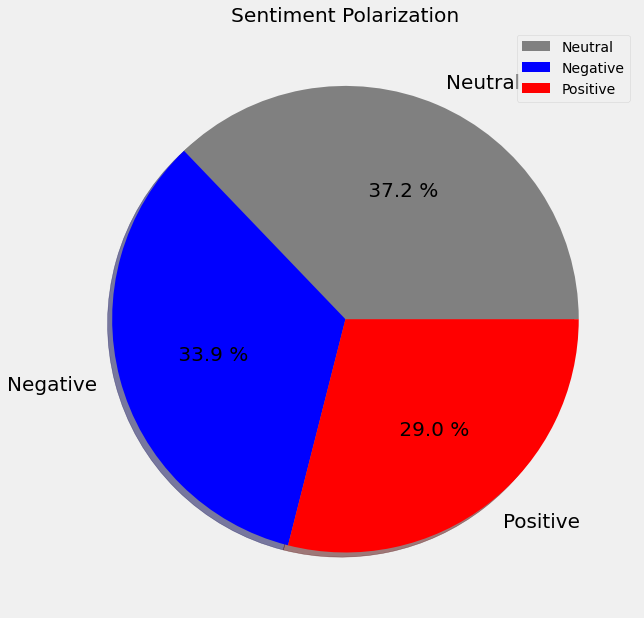

In [102]:
visual_sentiment(clean_trump_tweet)

In [119]:
c=tfidf_analysis(clean_trump_tweet)

tfidf Running time: 3.4375 Seconds


In [122]:
c[2]

[(['covid covid covid'], 0.1919519933859016),
 (['lie lie lie'], 0.10168885363895977),
 (['chinese bank account'], 0.06512656918450233),
 (['bank account china'], 0.046118451278403694),
 (['liar liar liar'], 0.04227514140046642),
 (['super spreader event'], 0.04227514140046642),
 (['prison prison prison'], 0.03941098134537561),
 (['2020 year 2020'], 0.03941098134537561),
 (['year 2020 year'], 0.03722148238174363),
 (['endnigeria endnigeria endnigeria'], 0.03722148238174363),
 (['secret chinese bank'], 0.03493822066545735),
 (['secret bank account'], 0.03354069183883905),
 (['make america great'], 0.03313457028685206),
 (['president united state'], 0.027421713340843083),
 (['fake fake fake'], 0.02589339197681965),
 (['family rake million'], 0.021894989636319785),
 (['win america win'], 0.019705490672687804),
 (['left supporter stranded'], 0.019705490672687804),
 (['russianconnected money saved'], 0.019705490672687804),
 (['dirty russianconnected money'], 0.019705490672687804)]

In [105]:
get_most_pos_neg_text(clean_trump_tweet,"Trump")

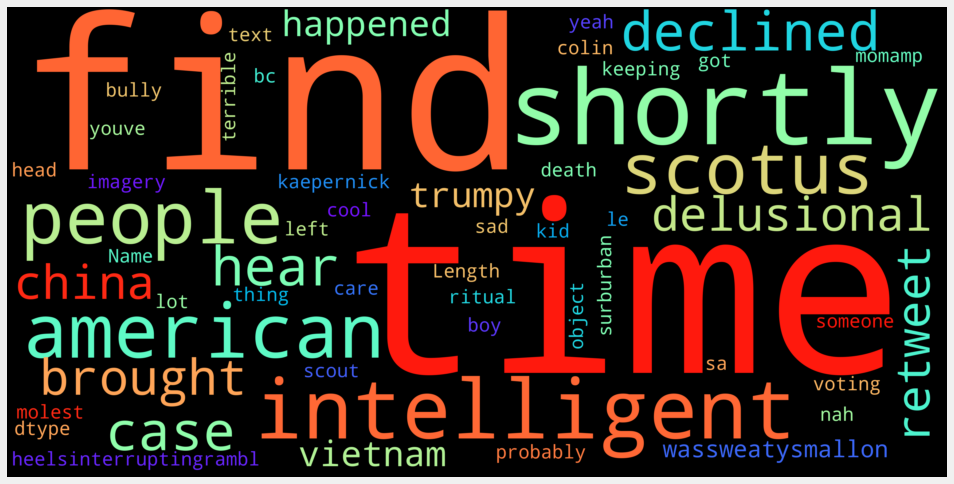

In [106]:
show_word_cloud(clean_trump_tweet)

# Biden

In [107]:
biden_tweet=pd.read_csv(r"joebiden_.csv",encoding="utf-8")

In [108]:
biden_tweet.head()

,time,user,text
0,2020/10/16 9:17,cathy0012,@valerie63547116 @Agent17Plus @MariannaNBCNews...
1,2020/10/16 9:17,MatyasBk,@Rich_inDestin @liberalesbase @petrogustavo @J...
2,2020/10/16 9:17,newsop60,@JoeBiden where鈥檚 Hunter? You鈥檙e a crook!
3,2020/10/16 9:17,SteveTaylorsRT,@MariannaNBCNews @realDonaldTrump @JoeBiden ht...
4,2020/10/16 9:17,a9da21bdd4fb451,@JoeBiden https://t.co/GhcJzgiMWT


In [109]:
clean_biden_tweet=preprocessing(biden_tweet)

Preprocessing Running time: 83.921875 Seconds
Preprocessing Running time: 83.9461178779602 Seconds
             user   text
time                    
2020-10-15  22565  22565
2020-10-16  22394  22394
2020-10-17  20778  20778
2020-10-18  15375  15375
2020-10-19  20014  20014
2020-10-20  29190  29190
2020-10-21  20630  20630
2020-10-22  23474  23474
2020-10-23  23782  23782
2020-10-24  20016  20016
2020-10-25  27257  27257
2020-10-26  22415  22415
2020-10-27  23940  23940
2020-10-28  18723  18723
2020-10-29  22344  22344
2020-10-30  23486  23486
2020-10-31  21823  21823
2020-11-01  22216  22216
2020-11-02  21390  21390
2020-11-03  20509  20509


In [110]:
clean_biden_tweet=add_sentiment(clean_biden_tweet)

Polarity apply Running time: 16.34375 Seconds


<ipython-input-95-aef3eb9dc359>:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-aef3eb9dc359>:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   category  counts
0   Neutral   38646
1  Positive   31590
2  Negative   29765


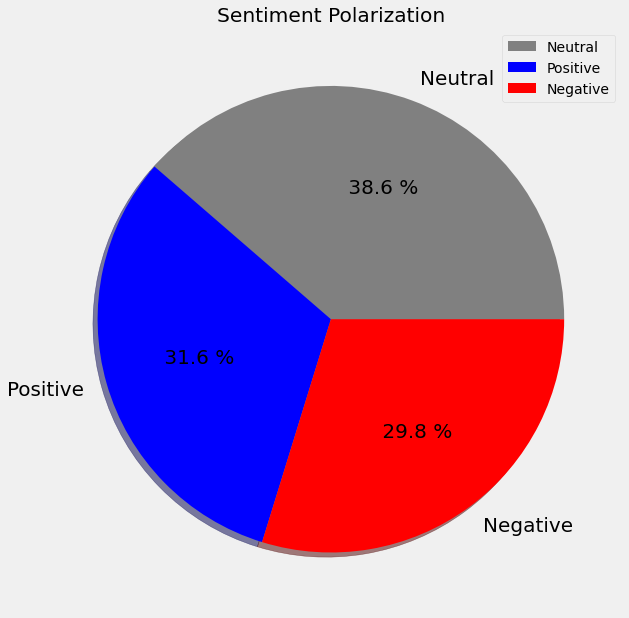

In [111]:
visual_sentiment(clean_biden_tweet)

In [112]:
get_most_pos_neg_text(clean_biden_tweet,"Biden")

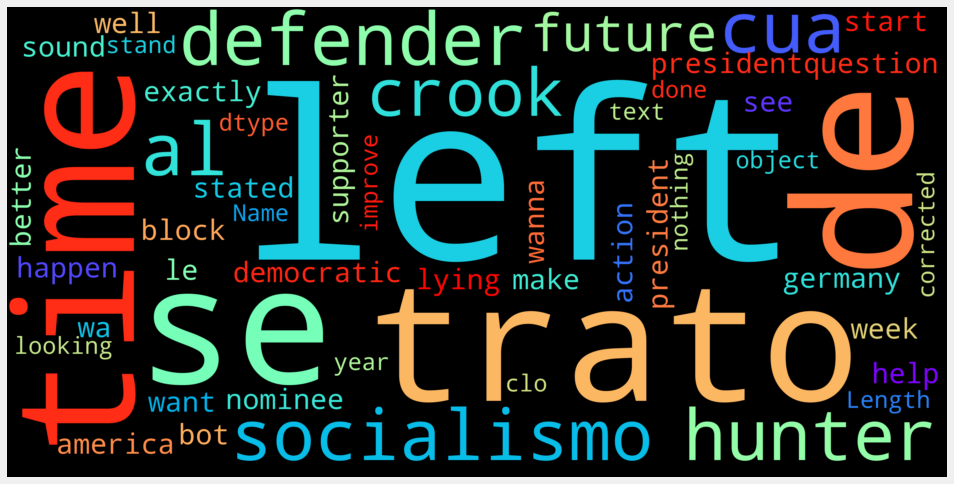

In [113]:
show_word_cloud(clean_biden_tweet)

In [123]:
d=tfidf_analysis(clean_biden_tweet)

tfidf Running time: 3.6875 Seconds


In [131]:
d[3]

[(['president united state'], 0.04786973288930404),
 (['corrupt corrupt corrupt'], 0.047167055903474434),
 (['vote vote vote'], 0.03850391558487499),
 (['stayinline stayinline stayinline'], 0.03788943878235283),
 (['integrales para conquistar'], 0.03589525779380795),
 (['plane integrales para'], 0.03589525779380795),
 (['con plane integrales'], 0.03589525779380795),
 (['long past time'], 0.034589174329214586),
 (['turntexasblue turntexasblue turntexasblue'], 0.03190689581671818),
 (['united state america'], 0.02913809828044594),
 (['wont win lol'], 0.0279185338396284),
 (['alllivesmattter godblessamerica blacksfortrumpgetreadytocrygodwinsalwaysdemoncratsloseagainusa'],
  0.0279185338396284),
 (['lol trumplandslidevictory2020 alllivesmattter'], 0.0279185338396284),
 (['trumplandslidevictory2020 alllivesmattter godblessamerica'],
  0.0279185338396284),
 (['win lol trumplandslidevictory2020'], 0.0279185338396284),
 (['slutty wont win'], 0.0279185338396284),
 (['47 year nothing'], 0.024975

In [125]:
clean_trump_tweet["name"]="trump"
clean_biden_tweet["name"]="biden"

<ipython-input-125-e66daff4e509>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-e66daff4e509>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
final=pd.concat([clean_trump_tweet,clean_biden_tweet],axis=0)
final.tail()

,user,text,sentiment_polar,sentiment_category,name
time,,,,,
2020-10-15,MarshaKimball10,well stated exactly left want happen wa,0.028571,Positive,biden
2020-10-15,TbPerchX,block lying bot,-0.066667,Negative,biden
2020-10-15,1CommonThreade2,like sound wanna see action democratic nominee,0.057143,Positive,biden
2020-10-15,pfactor100,supporter 3 week left better start looking clo...,0.060000,Positive,biden
2020-10-15,tw_vicki,stand corrected 47 year done nothing improve l...,0.036364,Positive,biden


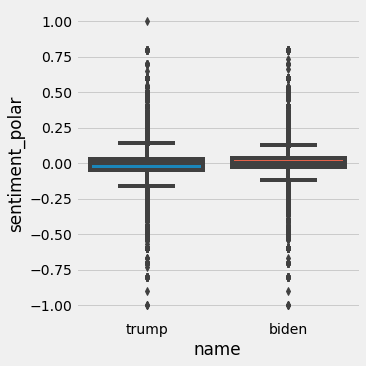

In [127]:
sns.catplot(x="name", y="sentiment_polar", kind="box", data=final)

<function matplotlib.pyplot.show(*args, **kw)>

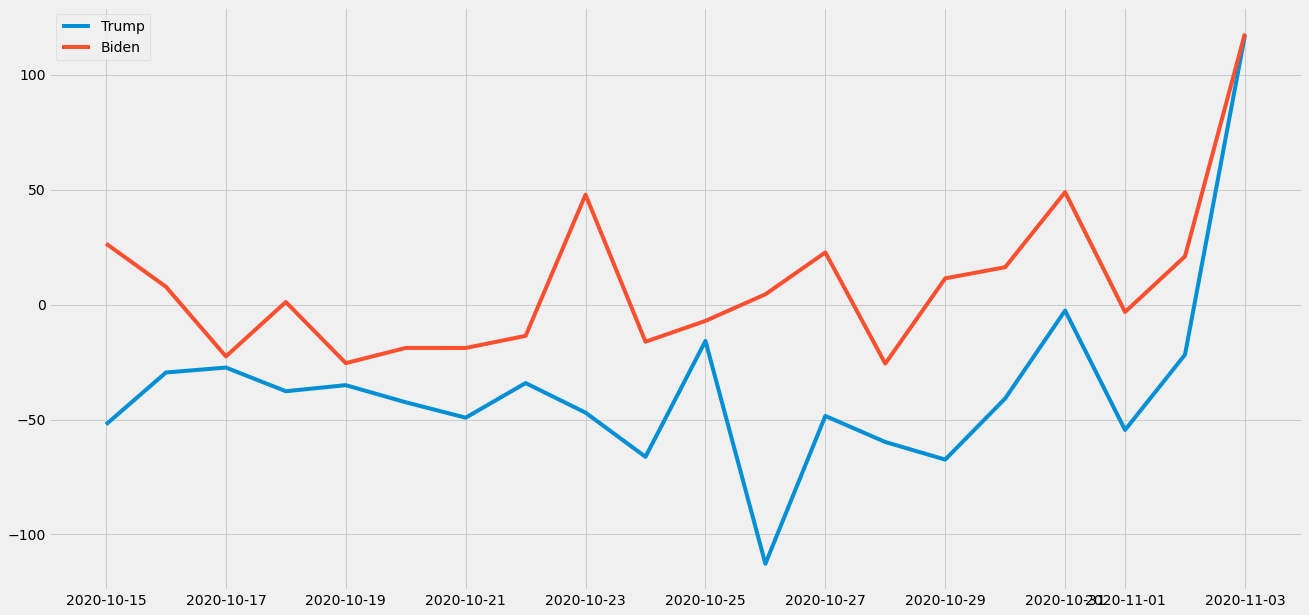

In [128]:
plt.figure(figsize=(20,10))
plt.plot(clean_trump_tweet.groupby(clean_trump_tweet.index)["sentiment_polar"].sum(),label="Trump")
plt.plot(clean_biden_tweet.groupby(clean_biden_tweet.index)["sentiment_polar"].sum(),label="Biden")
plt.legend()
plt.show

# LDA

In [168]:
import logging
import os
import jieba.posseg as psg
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn import preprocessing
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import glob
import pandas as pd
import numpy as np
import pyLDAvis.gensim
import matplotlib.pyplot as plt

def loadStops(filename):
    stops = []
    with open(filename, encoding='utf-8') as fr:
        fr.readline()
        for line in fr:
            stops.append(line.strip())
    return stops



def goTrainLDA(data,n_topic=10):

    dct = Dictionary(data)
    joblib.dump(dct, f'./models/dct{n_topic}.m')
    print('词库保存完毕！')
    corpus = [dct.doc2bow(_) for _ in data]
    print(len(dct))
    ldamodel = LdaModel(corpus=corpus, num_topics=n_topic, id2word=dct,eta=0.0001,passes=10)
    joblib.dump(ldamodel, f'./models/lda_model{n_topic}.m')
    print('LDA模型保存完毕！')

class LoadModel:
    def __init__(self,n_topic):
        self.ldamodel = joblib.load(f'./models/lda_model{n_topic}.m')
        self.dct = joblib.load(f'./models/dct{n_topic}.m')

    def batchPredict(self,data):
            #Print the 8 topic and largest weighted words in topic
#             topic_list=self.ldamodel.print_topics(8, 30)
            for topic in self.ldamodel.print_topics(20, 40):
                print(topic)
            
            for line in data:
                corpus = [self.dct.doc2bow(_) for _ in data]
                doc_lda = self.ldamodel[corpus[0]] 
                doc_lda_max = sorted(doc_lda, key=lambda k: k[1], reverse=True)[0]
                info = self.ldamodel.print_topic(doc_lda_max[0], 6)
                
                

                feather = [x.strip().replace('"', '').split('*') for x in info.strip().split('+')]
                weight_feather = [float(y[0]) for y in feather]
                word = [y[1] for y in feather]
#                 print("context:",line)
#                 print('LDA:', info)
#                 print('word:', word)
#                 print('weights:', weight_feather)
                self.ldamodel.print_topics(8, 30)
                break

    def topic_analysie(self,data):
            da = [self.dct.doc2bow(_) for _ in data]
            doc_lda = self.ldamodel[da]
            doc_lda_max = [sorted(w, key=lambda k: k[1], reverse=True)[0] for w in doc_lda]
            topic_list=[w for w,t in doc_lda_max]

            return topic_list

In [160]:
def cor(n_topic,corpus):
    print(f"=============={n_topic}===============")
    lm = LoadModel(n_topic)
    lm.batchPredict(corpus)
    topic_list=lm.topic_analysie(corpus)
    print(np.array(topic_list))


In [171]:
stopwords_ = ['em','im','de','lol','el','u','get','also','thats','wont','cant','e','2']

In [174]:
corpus = []
for line in clean_trump_tweet.text:
            corpus.append([w for w in str(line).split()if w not in stopwords_])

In [175]:
#训练LDA 模型，并保存
for i in range(1,10):
    goTrainLDA(corpus,i)

词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！
词库保存完毕！
63395
LDA模型保存完毕！


-2997.84133485862
-3000.8869973830347
-3005.4745053707643
-3006.2268635719756
-3008.0211675200308
-3007.3815423353403
-3012.8826625828096
-3012.0560285305373
-3013.515421935781


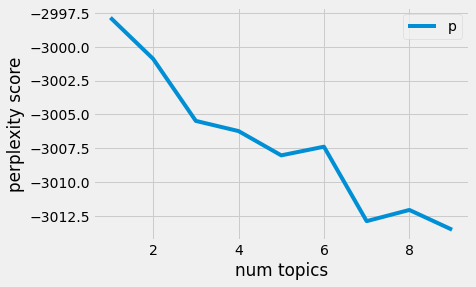

In [176]:
x_list = []
y_list = []
for i in range(1,10):
    lm = LoadModel(i)
    dct = Dictionary(corpus)
    data = [dct.doc2bow(_) for _ in corpus]
    perplexity = lm.ldamodel.log_perplexity(data)
    print(perplexity)
    x_list.append(i)
    y_list.append(perplexity)
plt.plot(x_list, y_list)
plt.xlabel('num topics')
plt.ylabel('perplexity score')
plt.legend(('perplexity_values'), loc='best')
plt.show()    

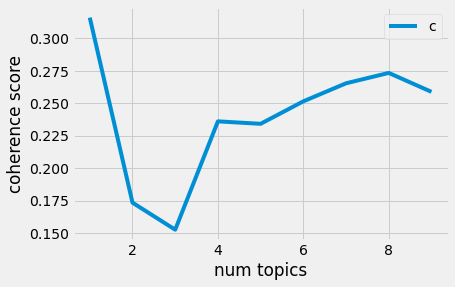

In [178]:
from gensim.models.coherencemodel import CoherenceModel
x1_list = []
y1_list = []
for i in range(1,10):
    lm = LoadModel(i)
    dct = Dictionary(corpus)
    data = [dct.doc2bow(_) for _ in corpus]
    cv_tmp = CoherenceModel(model=lm.ldamodel, texts=corpus, dictionary=dct, coherence='c_v')
    x1_list.append(i)
    y1_list.append(cv_tmp.get_coherence())
plt.plot(x1_list, y1_list)
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()  

In [179]:
for i in range(6,9):
    cor(i,corpus)

==============6===============
(0, '0.140*"kid" + 0.082*"care" + 0.019*"really" + 0.018*"said" + 0.015*"que" + 0.013*"white" + 0.013*"la" + 0.013*"already" + 0.011*"voted" + 0.011*"plan" + 0.010*"house" + 0.010*"case" + 0.009*"day" + 0.009*"obama" + 0.009*"wait" + 0.008*"le" + 0.008*"week" + 0.007*"end" + 0.006*"con" + 0.006*"never" + 0.006*"old" + 0.006*"business" + 0.006*"new" + 0.006*"blue" + 0.006*"bidenharris2020" + 0.006*"ill" + 0.005*"stand" + 0.005*"los" + 0.005*"stay" + 0.005*"bidens" + 0.005*"putin" + 0.005*"one" + 0.005*"nobody" + 0.005*"school" + 0.005*"part" + 0.005*"everything" + 0.005*"literally" + 0.005*"change" + 0.005*"know" + 0.004*"forget"')
(1, '0.070*"mirror" + 0.036*"lie" + 0.029*"covid" + 0.019*"tax" + 0.017*"look" + 0.015*"god" + 0.013*"like" + 0.013*"people" + 0.012*"thank" + 0.012*"show" + 0.012*"believe" + 0.012*"virus" + 0.011*"pay" + 0.011*"let" + 0.010*"know" + 0.009*"death" + 0.008*"poll" + 0.008*"president" + 0.007*"red" + 0.007*"coming" + 0.007*"money"

[1 4 2 ... 0 3 6]
==============8===============
(0, '0.086*"voting" + 0.028*"think" + 0.026*"good" + 0.025*"know" + 0.024*"year" + 0.021*"let" + 0.021*"4" + 0.018*"done" + 0.016*"see" + 0.016*"nothing" + 0.014*"people" + 0.012*"plan" + 0.011*"even" + 0.011*"want" + 0.010*"lose" + 0.010*"take" + 0.010*"tell" + 0.009*"doesnt" + 0.009*"country" + 0.009*"pandemic" + 0.009*"one" + 0.009*"twitter" + 0.008*"mean" + 0.008*"everyone" + 0.008*"poll" + 0.008*"really" + 0.008*"youve" + 0.008*"gop" + 0.007*"stupid" + 0.007*"president" + 0.007*"as" + 0.007*"could" + 0.007*"away" + 0.006*"blue" + 0.006*"line" + 0.006*"need" + 0.006*"make" + 0.006*"republican" + 0.005*"better" + 0.005*"hear"')
(1, '0.142*"kid" + 0.074*"criminal" + 0.070*"example" + 0.069*"bc" + 0.069*"bully" + 0.017*"great" + 0.013*"white" + 0.011*"house" + 0.010*"fact" + 0.010*"liar" + 0.008*"yeah" + 0.008*"account" + 0.008*"bank" + 0.008*"family" + 0.007*"hell" + 0.007*"thought" + 0.007*"chinese" + 0.007*"little" + 0.006*"town" + 0

In [ ]:
corpus = []
for line in clean_biden_tweet.text:
            corpus.append([w for w in str(line).split()if w not in stopwords_])
#训练LDA 模型，并保存
for i in range(1,10):
    goTrainLDA(corpus,i)        

In [158]:
clean_trump_tweet

,user,text,sentiment_polar,sentiment_category
time,,,,
2020-10-16,DiogenesMan,find shortly intelligent american people,0.080000,Positive
2020-10-16,DIDNOTVOTEFOR44,scotus declined hear case brought delusional d...,-0.054545,Negative
2020-10-16,33ajel,china retweet happened vietnam,0.000000,Neutral
2020-10-16,OZAnswers,trumpy wassweatysmallon heelsinterruptingrambl...,0.000000,Neutral
2020-10-16,ToddPoltRRA,yeah cool molest like boy scout nah,0.114286,Positive
...,...,...,...,...
2020-10-27,Trickface1,head imagery ritual death,-0.100000,Negative
2020-10-27,Pearlofwisdom2,youve got left sad,-0.100000,Negative
2020-10-27,czarface5,probably lot le colin kaepernick,0.000000,Neutral


In [ ]:
x_list = []
y_list = []
for i in range(1,10):
    lm = LoadModel(i)
    dct = Dictionary(corpus)
    data = [dct.doc2bow(_) for _ in corpus]
    perplexity = lm.ldamodel.log_perplexity(data)
    print(perplexity)
    x_list.append(i)
    y_list.append(perplexity)
plt.plot(x_list, y_list)
plt.xlabel('num topics')
plt.ylabel('perplexity score')
plt.legend(('perplexity_values'), loc='best')
plt.show()    

In [ ]:
x1_list = []
y1_list = []
for i in range(1,10):
    lm = LoadModel(i)
    dct = Dictionary(corpus)
    data = [dct.doc2bow(_) for _ in corpus]
    cv_tmp = CoherenceModel(model=lm.ldamodel, texts=corpus, dictionary=dct, coherence='c_v')
    x1_list.append(i)
    y1_list.append(cv_tmp.get_coherence())
plt.plot(x1_list, y1_list)
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()  

In [ ]:
for i in range(2,4):
    cor(i,corpus)

In [182]:
corpus = []
for line in clean_biden_tweet.text:
            corpus.append([w for w in str(line).split()if w not in stopwords_])

In [183]:
#训练LDA 模型，并保存
for i in range(1,10):
    goTrainLDA(corpus,i)

词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！
词库保存完毕！
62924
LDA模型保存完毕！


-2916.32513960972
-2921.8676902917123
-2922.108540910809
-2926.585679940802
-2927.47891777215
-2933.174819873506
-2936.25242499801
-2936.242645958802
-2935.4504216566716


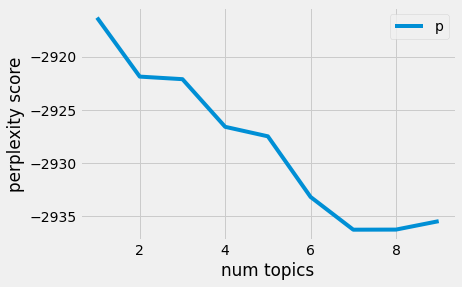

In [184]:
x_list = []
y_list = []
for i in range(1,10):
    lm = LoadModel(i)
    dct = Dictionary(corpus)
    data = [dct.doc2bow(_) for _ in corpus]
    perplexity = lm.ldamodel.log_perplexity(data)
    print(perplexity)
    x_list.append(i)
    y_list.append(perplexity)
plt.plot(x_list, y_list)
plt.xlabel('num topics')
plt.ylabel('perplexity score')
plt.legend(('perplexity_values'), loc='best')
plt.show() 

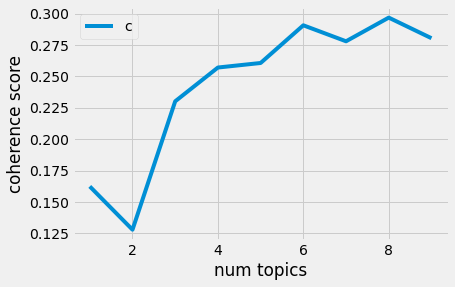

In [185]:
from gensim.models.coherencemodel import CoherenceModel
x1_list = []
y1_list = []
for i in range(1,10):
    lm = LoadModel(i)
    dct = Dictionary(corpus)
    data = [dct.doc2bow(_) for _ in corpus]
    cv_tmp = CoherenceModel(model=lm.ldamodel, texts=corpus, dictionary=dct, coherence='c_v')
    x1_list.append(i)
    y1_list.append(cv_tmp.get_coherence())
plt.plot(x1_list, y1_list)
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()  

In [186]:
for i in range(8,9):
    cor(i,corpus)

==============8===============
(0, '0.022*"please" + 0.022*"need" + 0.022*"one" + 0.021*"lie" + 0.020*"people" + 0.019*"love" + 0.018*"know" + 0.016*"make" + 0.015*"watch" + 0.015*"keep" + 0.015*"good" + 0.014*"man" + 0.013*"mask" + 0.012*"great" + 0.011*"stop" + 0.011*"could" + 0.011*"another" + 0.011*"better" + 0.011*"ill" + 0.011*"much" + 0.011*"thing" + 0.010*"everyone" + 0.010*"sure" + 0.010*"covid" + 0.010*"want" + 0.010*"think" + 0.009*"tell" + 0.009*"word" + 0.009*"come" + 0.008*"isnt" + 0.008*"every" + 0.008*"try" + 0.007*"pandemic" + 0.007*"take" + 0.007*"time" + 0.007*"anyone" + 0.007*"truth" + 0.007*"country" + 0.007*"poll" + 0.007*"someone"')
(1, '0.184*"public" + 0.036*"win" + 0.021*"election" + 0.019*"yes" + 0.018*"tonight" + 0.014*"god" + 0.014*"day" + 0.012*"state" + 0.012*"news" + 0.012*"call" + 0.011*"let" + 0.011*"president" + 0.010*"friend" + 0.010*"best" + 0.009*"death" + 0.009*"home" + 0.009*"end" + 0.009*"wait" + 0.009*"trump" + 0.009*"usa" + 0.009*"fake" + 0.00